Attempts to reproduce results in 10.1016/j.chaos.2020.110036.

In [1]:
from copy import deepcopy
from matplotlib import pyplot as plt
import os

from sde_models import Din2020
import sde

store_ssr_data = True
load_ssr_data = False

fig_kwargs = dict(
    layout='compressed',
    figsize=(12.0, 3.0)
)
plot_all_kwargs = dict(
    color='gray',
    alpha=0.1
)
fig_compare_kwargs = dict(
    layout='compressed', 
    figsize=(8.0, 4.0)
)

t_fin = 10.0
dt = 0.01  # Not reported
sample_size = 1000  # Assume sufficient
tested_sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
confidence = 0.95

results_dir = os.path.join('results', Din2020.name)

def initial_values(**kwargs):
    result = {'S': 0.9,
              'I': 0.7,
              'Q': 0.5}
    result.update(kwargs)
    result['N'] = sum([result[k] for k in ['S', 'I', 'Q']])
    return result

In [2]:
num_steps = int(t_fin / dt)

if sde.get_pool() is None:
    sde.start_pool()

Attempting to reproduce Figure 4.

Sometimes single trajectories look similar, and other times they don't. 

With large sample size, neither case (i.e., so-called "extinction" or "stationary") sufficiently reaches equilibrium to conclude whether extinction occurs. 

In [3]:
initial_values_extinction = initial_values()
parameters_extinction = deepcopy(Din2020.parameter_defaults)

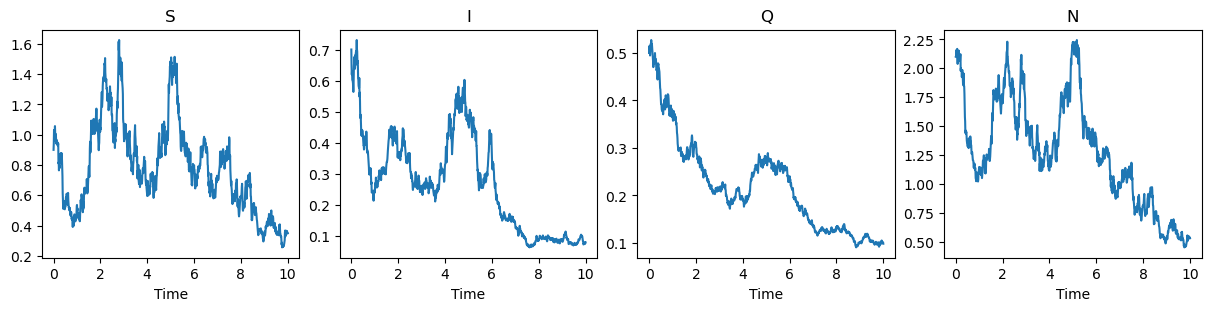

In [4]:
_ = sde.SDESimulation(Din2020(), num_steps, dt, initial_values=initial_values_extinction, parameters=parameters_extinction).run().plot(fig_kwargs=fig_kwargs)

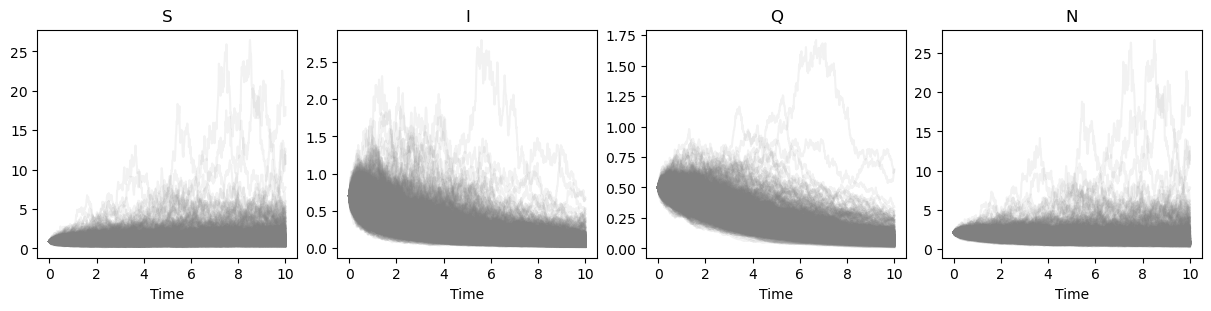

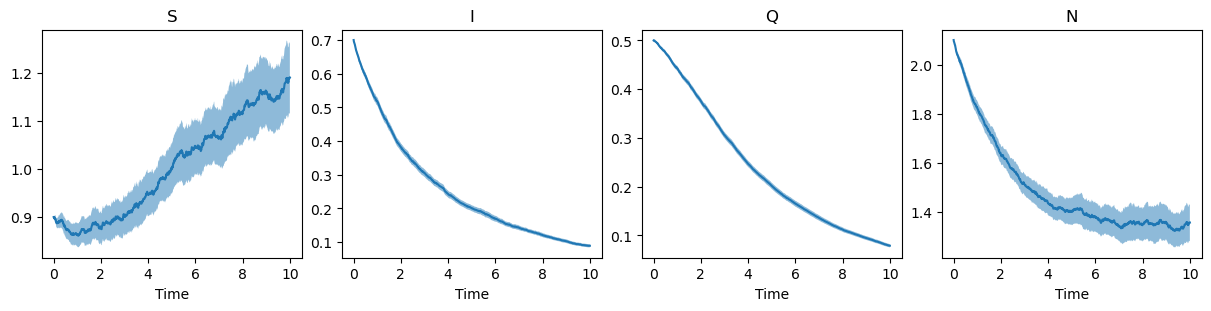

In [5]:
result_fig_4_extinction = sde.execute_sample(sample_size, 
                                             Din2020(), 
                                             num_steps, 
                                             dt, 
                                             initial_values=initial_values_extinction, 
                                             parameters=parameters_extinction)
result_fig_4_extinction.plot(fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)

fig, axs = result_fig_4_extinction.plot_ci(confidence, 
                                           fig_kwargs=fig_kwargs, 
                                           plot_all_kwargs=dict(alpha=0.5))
_ = result_fig_4_extinction.plot_mean(fig_axs=(fig, axs))

In [6]:
initial_values_stationary = initial_values()
parameters_stationary = dict(lam=0.5, 
                             mu0=0.2,
                             beta=0.6,
                             gam=0.3,
                             mu1=0.2,
                             sig=0.1,
                             mu=0.2,
                             noise_S=0.5,
                             noise_I=0.7,
                             noise_Q=0.6)

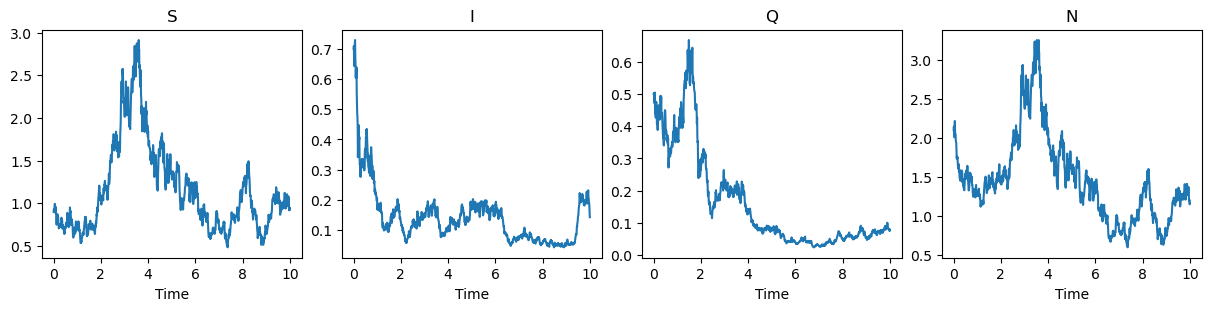

In [7]:
_ = sde.SDESimulation(Din2020(), num_steps, dt, initial_values=initial_values_stationary, parameters=parameters_stationary).run().plot(fig_kwargs=fig_kwargs)

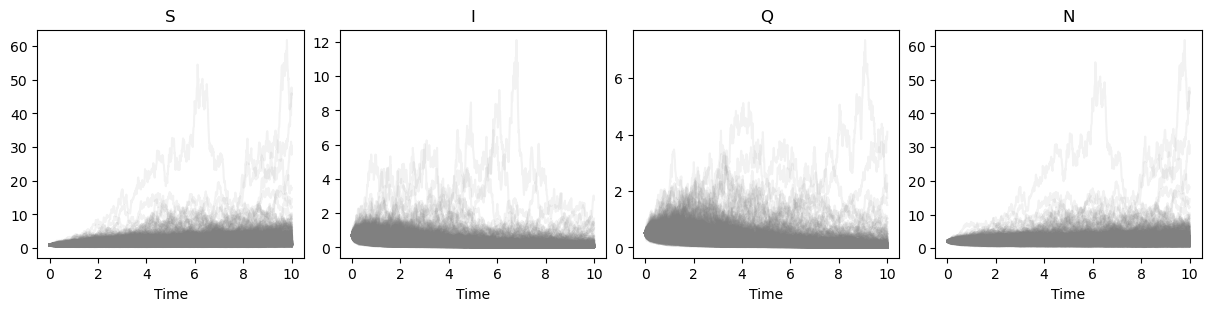

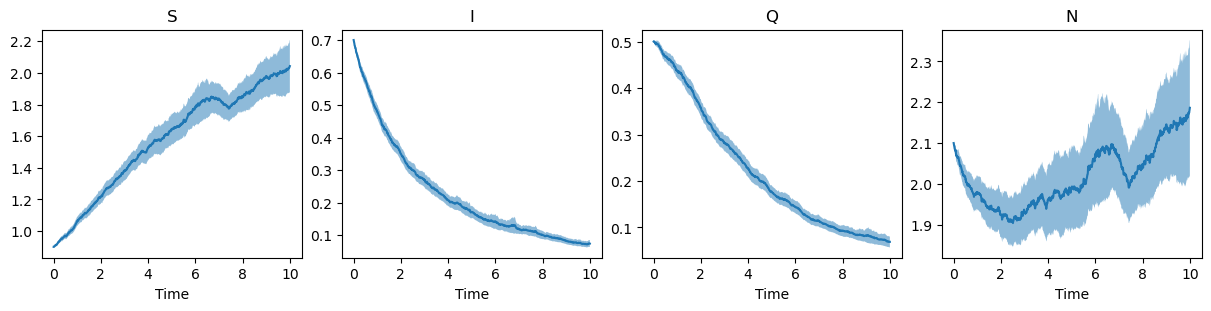

In [8]:
result_fig_4_stationary = sde.execute_sample(sample_size, 
                                             Din2020(), 
                                             num_steps, 
                                             dt, 
                                             initial_values=initial_values_stationary, 
                                             parameters=parameters_stationary)
result_fig_4_stationary.plot(fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)

fig, axs = result_fig_4_stationary.plot_ci(confidence, 
                                           fig_kwargs=fig_kwargs, 
                                           plot_all_kwargs=dict(alpha=0.5))
_ = result_fig_4_stationary.plot_mean(fig_axs=(fig, axs))

When running longer than reported, we see extinction for both scenarios. 

In [9]:
t_fin_longer = t_fin * 10
num_steps_longer = int(t_fin_longer / dt)

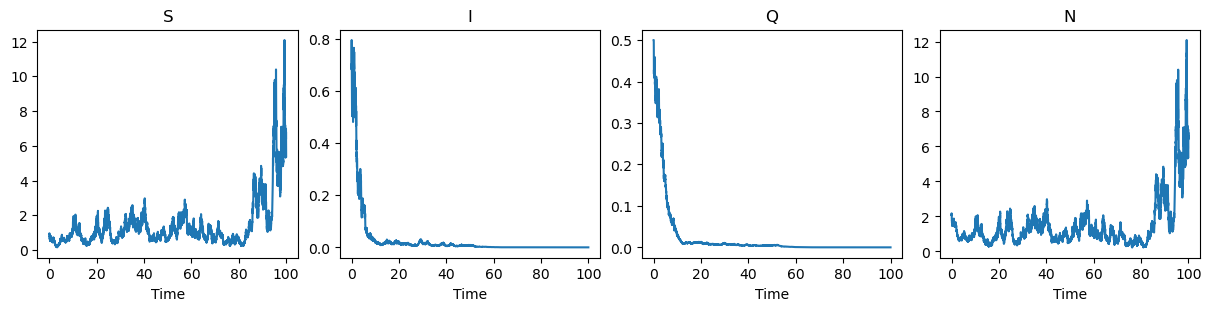

In [10]:
_ = sde.SDESimulation(Din2020(), 
                      num_steps_longer, 
                      dt, 
                      initial_values=initial_values_extinction, 
                      parameters=parameters_extinction).run().plot(fig_kwargs=fig_kwargs)

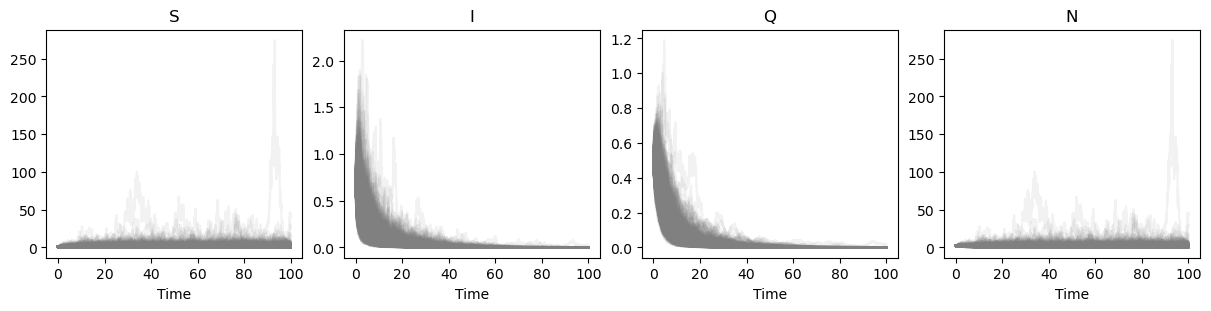

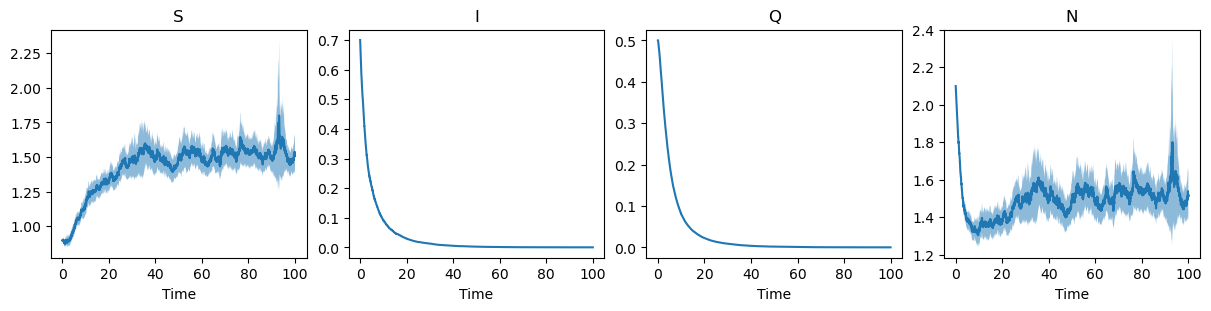

In [11]:
result_extinction_longer = sde.execute_sample(sample_size, 
                                              Din2020(), 
                                              num_steps_longer, 
                                              dt, 
                                              initial_values=initial_values_extinction, 
                                              parameters=parameters_extinction)
result_extinction_longer.plot(fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)

fig, axs = result_extinction_longer.plot_ci(confidence, 
                                            fig_kwargs=fig_kwargs, 
                                            plot_all_kwargs=dict(alpha=0.5))
_ = result_extinction_longer.plot_mean(fig_axs=(fig, axs))

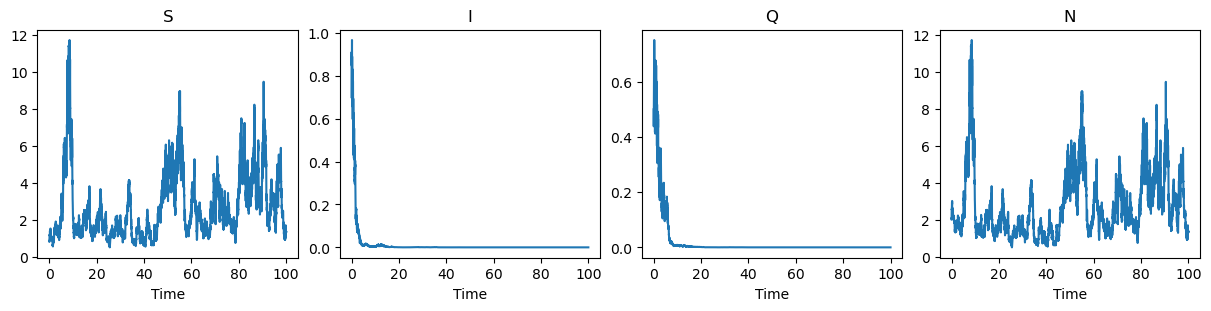

In [12]:
_ = sde.SDESimulation(Din2020(), num_steps_longer, dt, initial_values=initial_values_stationary, parameters=parameters_stationary).run().plot(fig_kwargs=fig_kwargs)

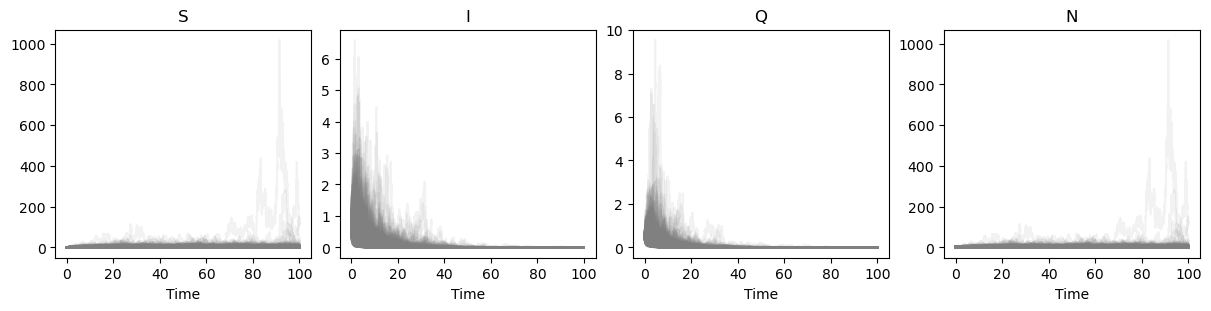

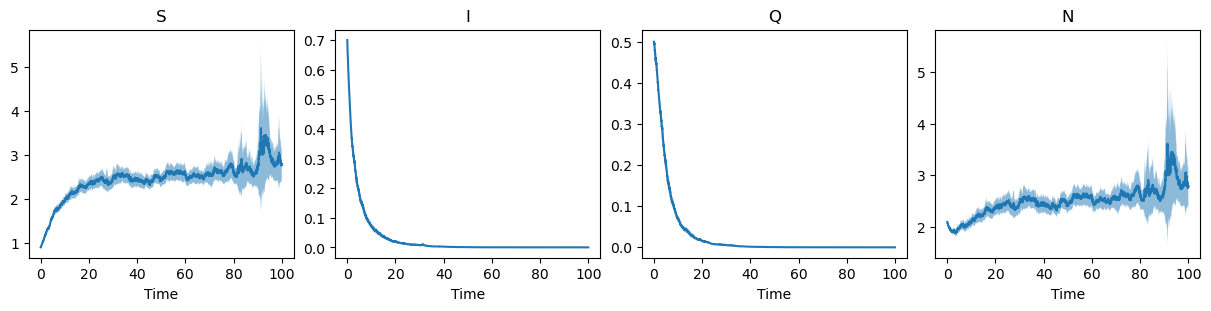

In [13]:
result_stationary_longer = sde.execute_sample(sample_size, 
                                              Din2020(), 
                                              num_steps_longer, 
                                              dt, 
                                              initial_values=initial_values_stationary, 
                                              parameters=parameters_stationary)
result_stationary_longer.plot(fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)

fig, axs = result_stationary_longer.plot_ci(confidence, 
                                            fig_kwargs=fig_kwargs, 
                                            plot_all_kwargs=dict(alpha=0.5))
_ = result_stationary_longer.plot_mean(fig_axs=(fig, axs))

Quantify reproducibility of extinction results.

Extinction Results EFECT Error (mean +- st. dev)
Sample size 10: 1.4771119188892428 +- 0.05868347119558217
Sample size 50: 0.7020854792261175 +- 0.038055041693526796
Sample size 100: 0.4984055654484102 +- 0.027231381343921914
Sample size 500: 0.22526320443123168 +- 0.01188466522876333
Sample size 1000: 0.1582045954842288 +- 0.00840271332703549
Sample size 5000: 0.07104791103626074 +- 0.003998395704962941
Sample size 10000: 0.05036617587381738 +- 0.0024820387523811


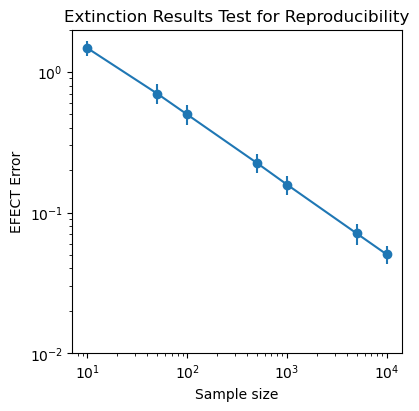

In [14]:
prefix_extinction = 'results_extinction'

if load_ssr_data:
    md_data, res_data = sde.load_ssr_dataset(results_dir, prefix_extinction)[:2]
    ssr_metadata_extinction = {}
    ssr_results_extinction = {}
    for i in range(len(md_data)):
        ssr_metadata_extinction[md_data[i].sample_size] = md_data[i]
        ssr_results_extinction[md_data[i].sample_size] = res_data[i]
else:
    ssr_metadata_extinction, ssr_results_extinction = sde.generate_ssr_dataset(
        Din2020(),
        tested_sample_sizes,
        num_steps,
        dt,
        initial_values_extinction,
        parameters_extinction,
        prefix_extinction,
        results_dir=results_dir if store_ssr_data else None
    )

fig, ax = sde.plot_repro(ssr_metadata_extinction)
ax.set_title('Extinction Results Test for Reproducibility')

print('Extinction Results EFECT Error (mean +- st. dev)')
for sz, md in ssr_metadata_extinction.items():
    print(f'Sample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Quantify reproducibility of stationary results.

Stationary Results EFECT Error (mean +- st. dev)
Sample size 10: 1.470767528564981 +- 0.06061315365090458
Sample size 50: 0.694864649507779 +- 0.03361543014905856
Sample size 100: 0.49884863857373146 +- 0.02460197651714216
Sample size 500: 0.2228617876877891 +- 0.011896481544230541
Sample size 1000: 0.15632417262718026 +- 0.008279769379394364
Sample size 5000: 0.0700793105761132 +- 0.0037804416400265797
Sample size 10000: 0.0495808432521235 +- 0.002601178773759673


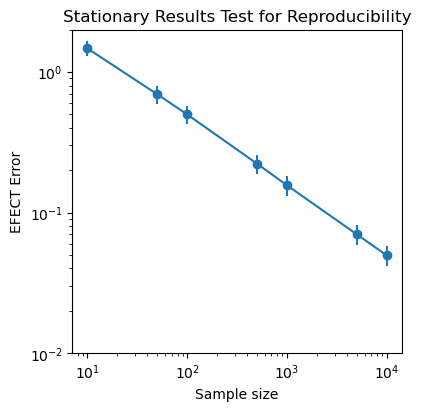

In [15]:
prefix_stationary = 'results_stationary'

if load_ssr_data:
    md_data, res_data = sde.load_ssr_dataset(results_dir, prefix_stationary)[:2]
    ssr_metadata_stationary = {}
    ssr_results_stationary = {}
    for i in range(len(md_data)):
        ssr_metadata_stationary[md_data[i].sample_size] = md_data[i]
        ssr_results_stationary[md_data[i].sample_size] = res_data[i]
else:
    ssr_metadata_stationary, ssr_results_stationary = sde.generate_ssr_dataset(
        Din2020(),
        tested_sample_sizes,
        num_steps,
        dt,
        initial_values_stationary,
        parameters_stationary,
        prefix_stationary,
        results_dir=results_dir if store_ssr_data else None
    )

fig, ax = sde.plot_repro(ssr_metadata_stationary)
ax.set_title('Stationary Results Test for Reproducibility')

print('Stationary Results EFECT Error (mean +- st. dev)')
for sz, md in ssr_metadata_stationary.items():
    print(f'Sample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Show reproducible extinction results.

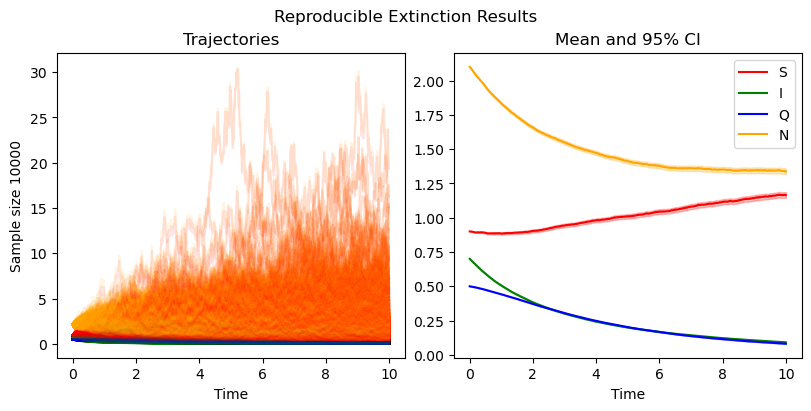

In [16]:
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)

plot_colors_extinction = {
    'S': 'red',
    'I': 'green',
    'Q': 'blue',
    'N': 'orange'
}

ssr_results_extinction_sz = max(ssr_results_extinction.keys())

r: sde.SDEResultSample = ssr_results_extinction[ssr_results_extinction_sz]
r.plot(fig_axs=(fig, [axs[0]] * len(Din2020.variable_names)),
       plot_all_kwargs=dict(alpha=0.1),
       plot_kwargs={n: dict(color=plot_colors_extinction[n]) 
                    for n in Din2020.variable_names})

r.plot_ci(confidence, fig_axs=(fig, [axs[1]] * len(Din2020.variable_names)),
            plot_all_kwargs=dict(alpha=0.25),
            plot_kwargs={n: dict(color=plot_colors_extinction[n]) 
                         for n in Din2020.variable_names})
r.plot_mean(fig_axs=(fig, [axs[1]] * len(Din2020.variable_names)),
            plot_kwargs={n: dict(color=plot_colors_extinction[n], label=n) 
                         for n in Din2020.variable_names})

fig.suptitle('Reproducible Extinction Results')
axs[0].set_title('Trajectories')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
axs[0].set_ylabel(f'Sample size {ssr_results_extinction_sz}')
_ = axs[1].legend()

Show reproducible stationary results.

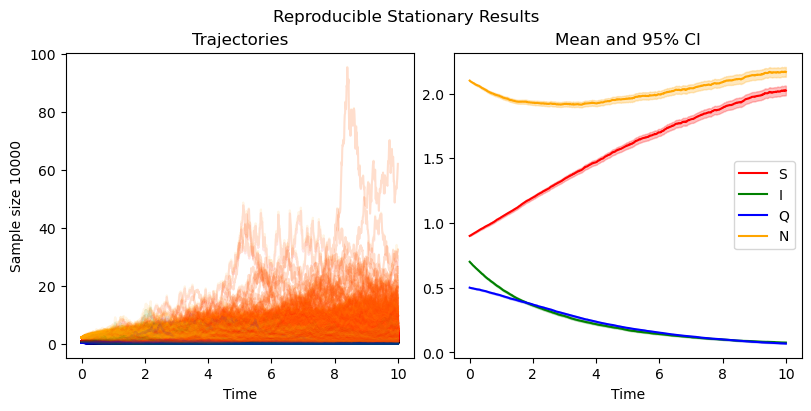

In [17]:
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)

plot_colors_stationary = {
    'S': 'red',
    'I': 'green',
    'Q': 'blue',
    'N': 'orange'
}

ssr_results_stationary_sz = max(ssr_results_stationary.keys())

r: sde.SDEResultSample = ssr_results_stationary[ssr_results_stationary_sz]
r.plot(fig_axs=(fig, [axs[0]] * len(Din2020.variable_names)),
       plot_all_kwargs=dict(alpha=0.1),
       plot_kwargs={n: dict(color=plot_colors_stationary[n]) 
                    for n in Din2020.variable_names})

r.plot_ci(confidence, fig_axs=(fig, [axs[1]] * len(Din2020.variable_names)),
            plot_all_kwargs=dict(alpha=0.25),
            plot_kwargs={n: dict(color=plot_colors_stationary[n]) 
                         for n in Din2020.variable_names})
r.plot_mean(fig_axs=(fig, [axs[1]] * len(Din2020.variable_names)),
            plot_kwargs={n: dict(color=plot_colors_stationary[n], label=n) 
                         for n in Din2020.variable_names})

fig.suptitle('Reproducible Stationary Results')
axs[0].set_title('Trajectories')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
axs[0].set_ylabel(f'Sample size {ssr_results_stationary_sz}')
_ = axs[1].legend()